# Riiid Project: Minimally Viable Product (MVP)  

## About Riiid Labs

Riiid Labs, an AI solutions provider delivering creative disruption to the education market. With a strong belief in equal opportunity in education, Riiid launched an AI tutor based on deep-learning algorithms in 2017 that attracted more than one million South Korean students. This year, the company released EdNet, the world’s largest open database for AI education containing more than 100 million student interactions. [Source](https://www.kaggle.com/c/riiid-test-answer-prediction/overview/description)

## Our Goal

The goal of this project is to create a machine learning model that can predict whether or not a user will answer a problem correctly using data from Riiid's EdNet Database. 

# Imports

In [1]:
# General Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Train Validate Test
from sklearn.model_selection import train_test_split

# Modeling Imports
from sklearn.cluster import KMeans

# Acquire and Prepare Files
import acquire, prepare, explore, model
from explore import rfe_ranker

# Sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Warnings 
import warnings
warnings.filterwarnings("ignore")

# Acquire
Acqure the data used for this project.

In [4]:
# Reading in data from local files
df_train = pd.read_csv('sampled_trainset.csv')
df_validate = pd.read_csv('validate.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_validate.shape, df_test.shape

((411517, 18), (50842, 18), (52868, 18))

In [5]:
# Train Data
df_train.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173


In [6]:
# Validate Data
df_validate.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,15625124241,1864702,3209,0,2152,3,1,34660.0,True,NaN,NaN,NaN,NaN,3209.0,3207.0,3.0,4.0,157 169 162 38
1,15625124241,1864702,3208,0,2152,3,1,34660.0,True,NaN,NaN,NaN,NaN,3208.0,3207.0,3.0,4.0,113 169 162 38


In [7]:
# Test Data
df_test.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,20170378604,1864702,8811,0,2494,1,1,3000.0,True,NaN,NaN,NaN,NaN,8811.0,8811.0,1.0,5.0,45
1,20170394313,1864702,8643,0,2495,3,1,4000.0,True,NaN,NaN,NaN,NaN,8643.0,8643.0,3.0,5.0,15


<b>Takeaways</b>
- Data acquired from Kaggle. 
- The data is stored in three separate files: lectures.csv, questions.csv, and train.csv. 
- We used a random sample of 100K users for our analysis. 
- Functions used to acquire the data are stored in the acquire.py module.

# Prepare
Preparing the data for future exploration and modeling.

### Run Prepare Function (found in prepare.py module)

In [8]:
# Produce train/validate/test
# Produce scaled train/validate/test
train, validate, test, train_s, validate_s, test_s = prepare.prep_riiid(df_train, df_validate, df_test)

In [9]:
# Print the shape of train
print(train.shape)

# Display first 5 rows of train
train.head()

(403377, 10)


,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,0,0.630049,0,45951.0,11917302.0,0.818182,0.682248,6.514429e+09,22241.021251
1,0,0,0.630049,0,28391.0,11917302.0,0.550000,0.534988,6.514429e+09,22241.021251
2,1,0,0.630049,0,22436.0,11917302.0,0.444444,0.445216,6.514429e+09,22241.021251
3,1,0,0.630049,0,36191.0,11917302.0,0.406250,0.544008,6.514429e+09,22241.021251
4,0,0,0.630049,0,24322.0,11917302.0,0.687500,0.485282,6.514429e+09,22241.021251


In [10]:
# Print the shape of train scaled
print(train_s.shape)

# Display first 5 rows of train scaled 
train_s.head()

(403377, 9)


,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,0,0.630049,0.818182,0.682248,0.119858,0.515734,0.0,0.001202
1,0,0,0.630049,0.550000,0.534988,0.119858,0.515734,0.0,0.001202
2,1,0,0.630049,0.444444,0.445216,0.119858,0.515734,0.0,0.001202
3,1,0,0.630049,0.406250,0.544008,0.119858,0.515734,0.0,0.001202
4,0,0,0.630049,0.687500,0.485282,0.119858,0.515734,0.0,0.001202


In [11]:
# Print the shape of validate 
print(validate.shape)

# Display first 5 rows of validate
validate.head()

(49945, 9)


,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,1,0.630049,0,11917302.0,0.604167,0.478261,6.514429e+09,22241.021251
1,1,1,0.630049,0,11917302.0,0.708333,0.478261,6.514429e+09,22241.021251
2,1,1,0.630049,0,11917302.0,0.687500,0.478261,6.514429e+09,22241.021251
3,1,1,0.630049,0,11917302.0,0.735294,0.619048,6.514429e+09,22241.021251
4,1,1,0.630049,0,11917302.0,0.852941,0.619048,6.514429e+09,22241.021251


In [12]:
# Print the shape of validate scaled 
print(validate_s.shape)

# Display first 5 rows of validate scaled 
validate_s.head()

(49945, 9)


,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,1,0.630049,0.604167,0.478261,0.119858,0.515734,0.0,0.001202
1,1,1,0.630049,0.708333,0.478261,0.119858,0.515734,0.0,0.001202
2,1,1,0.630049,0.687500,0.478261,0.119858,0.515734,0.0,0.001202
3,1,1,0.630049,0.735294,0.619048,0.119858,0.515734,0.0,0.001202
4,1,1,0.630049,0.852941,0.619048,0.119858,0.515734,0.0,0.001202


In [13]:
# Print the shape of test
print(test.shape)

# Display first 5 rows of test
test.head()

(51971, 9)


,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,1,0.630049,0,11917302.0,0.468750,0.529412,6.514429e+09,22241.021251
1,1,1,0.630049,0,11917302.0,0.290323,0.578947,6.514429e+09,22241.021251
2,0,1,0.630049,0,11917302.0,0.387755,0.588235,6.514429e+09,22241.021251
3,1,1,0.630049,0,11917302.0,0.740741,0.714286,6.514429e+09,22241.021251
4,0,1,0.630049,0,11917302.0,0.428571,0.687500,6.514429e+09,22241.021251


In [14]:
# Print the shape of test scaled
print(test_s.shape)

# Display first 5 rows of test scaled
test_s.head()

(51971, 9)


,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,1,0.630049,0.468750,0.529412,0.119858,0.515734,0.0,0.001202
1,1,1,0.630049,0.290323,0.578947,0.119858,0.515734,0.0,0.001202
2,0,1,0.630049,0.387755,0.588235,0.119858,0.515734,0.0,0.001202
3,1,1,0.630049,0.740741,0.714286,0.119858,0.515734,0.0,0.001202
4,0,1,0.630049,0.428571,0.687500,0.119858,0.515734,0.0,0.001202


<b>Takeaways</b>  
Used prep_riiid function from prepare.py to make the following changes:
- Filled missing boolean values in question_had_explanation with False. Missing values indicated that the question did not have an explanation or the user viewed a lecture.
- Filled missing values in prior_question_elapsed_time with 0. Missing values indicated that a user viewed a lecture before answering the first question in a bundle.
- Dropped columns: lecture_id, tag, lecture_part, type_of, question_id, bundle_id, correct_answer, question_part, and tags
- Dropped rows considered lectures: Where answered_correctly = -1
- Data scaled 
- Train, Validate, Test

# Explore
Plotted graphs, ran feature selection, and performed hypothesis testing in order to discover drivers of 'answered_correctly'.

In [15]:
# Check data types and null value counts
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403377 entries, 0 to 403376
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   answered_correctly           403377 non-null  int64  
 1   question_had_explanation     403377 non-null  int64  
 2   user_acc_mean                403377 non-null  float64
 3   user_lectures_running_total  403377 non-null  int64  
 4   q_time                       403377 non-null  float64
 5   avg_user_q_time              403377 non-null  float64
 6   mean_content_accuracy        403377 non-null  float64
 7   mean_task_accuracy           403377 non-null  float64
 8   mean_timestamp_accuracy      403377 non-null  float64
 9   mean_priortime_accuracy      403377 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 43.9 MB


In [16]:
# Checking # of unique values in int64 data type columns
for col in train:
    if train[col].dtypes == 'int64': 
        print(f'{col} has {train[col].nunique()} unique values.')

answered_correctly has 2 unique values.
question_had_explanation has 2 unique values.
user_lectures_running_total has 249 unique values.


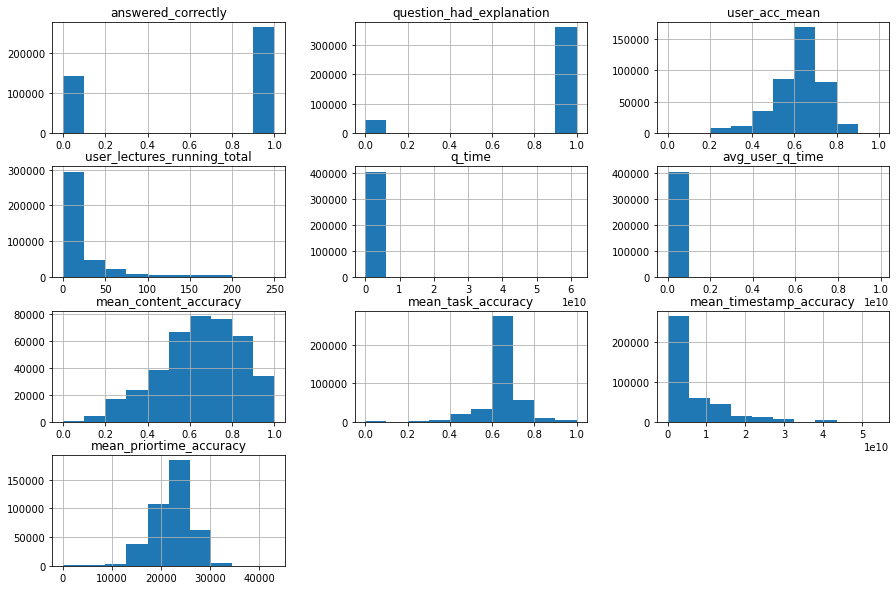

In [17]:
# Plot distribution of all train columns 
train.hist(figsize=(15, 10),
        grid=True) 
plt.show()

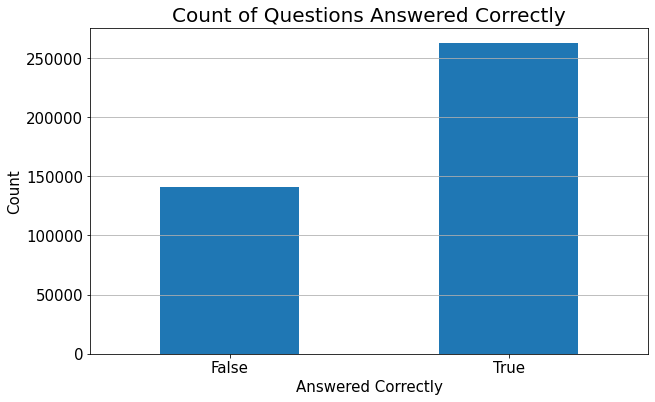

In [18]:
# Count of Questions Answered Correct
plt.figure(figsize=(10,6))
train.answered_correctly.value_counts().sort_index().plot.bar(grid=True)
answer_correctly = train.answered_correctly.mean()
plt.title("Count of Questions Answered Correctly",fontsize=20) 
plt.xlabel('Answered Correctly',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks([0,1],labels=['False','True'],rotation=0,fontsize=15) 
plt.yticks(rotation=0,fontsize=15) 
plt.grid(axis='x')
plt.show()

In [21]:
# Answered Correctly vs Prior Question Had Explanation
prior_question = train.groupby(['question_had_explanation', 'answered_correctly']).agg({'answered_correctly': ['count']})
questions_without_explanations = prior_question.iloc[:,0][:2]
questions_with_explanations = prior_question.iloc[:,0][2:]

In [115]:
# total number of questions with and without explanations
total_questions_without_explanations = sum(questions_without_explanations)
total_questions_with_explanations = sum(questions_with_explanations)

# questions without explanations
qwoe_incorrect = questions_without_explanations.iloc[0]/total_questions_without_explanations
qwoe_correct = questions_without_explanations.iloc[1]/total_questions_without_explanations

# questions with explanations
qwe_incorrect = questions_with_explanations.iloc[0]/total_questions_with_explanations
qwe_correct = questions_with_explanations.iloc[1]/total_questions_with_explanations

In [116]:
df = pd.DataFrame({
    'Question_had_an_explanation': ['Incorrect', 'Correct'],
    'Explanation': [qwe_incorrect, qwe_correct],
    'No Explanation': [qwoe_incorrect, qwoe_correct]
})
tidy = df.melt(id_vars='Question_had_an_explanation')

In [118]:
tidy

,Question_had_an_explanation,variable,value
0,Incorrect,Explanation,0.332033
1,Correct,Explanation,0.667967
2,Incorrect,No Explanation,0.491154
3,Correct,No Explanation,0.508846


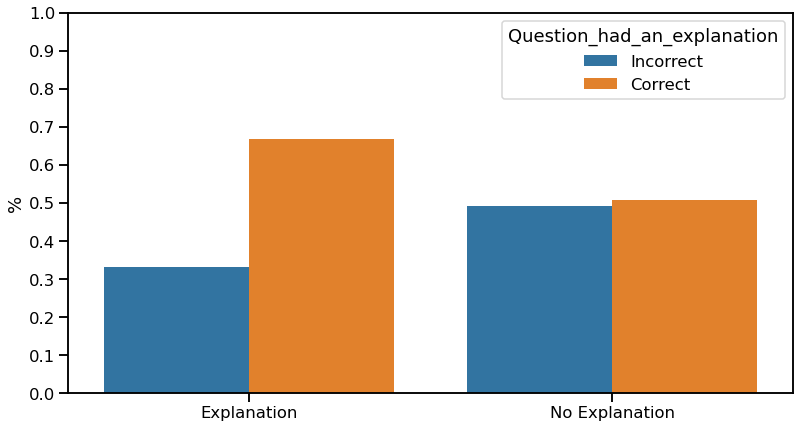

In [130]:
sns.set_context('talk')
plt.figure(figsize=(13, 7))
sns.barplot(x='variable', y='value', hue='Question_had_an_explanation', data=tidy)
plt.xlabel('')
plt.ylabel('%')
plt.ylim(0, 1)
plt.yticks(np.linspace(0,1,11));

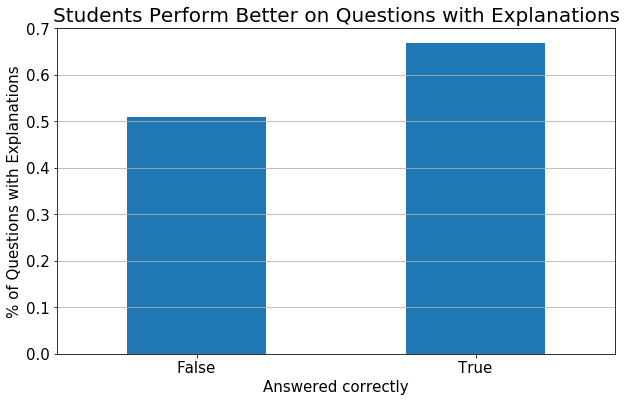

In [44]:
plt.figure(figsize=(10,6))
prior_question.plot.bar(grid=True)
plt.title("Students Perform Better on Questions with Explanations",fontsize=20)
plt.xlabel("Answered Correctly",fontsize=15)
plt.ylabel("% of Questions with Explanations",fontsize=15)
plt.xticks([0,1],labels=['False','True'],rotation=0,fontsize=15) 
plt.yticks(rotation=0,fontsize=15) 
plt.grid(axis='x')
plt.show() 


df = pd.DataFrame({
    'Answered': ['Growth', 'Value'],
    'Weight': [0.10, 0.20],
    'Variance': [0.15, 0.35]
})
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Factor').rename(columns=str.title)
seaborn.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1)
seaborn.despine(fig)

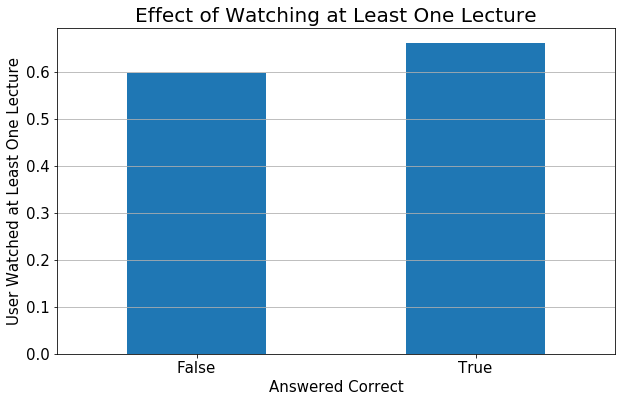

In [47]:
# Percentage of 'Users watched at least one lecture' vs 'Questions answered correct'
user_lect = df_train.groupby(["user_id", "answered_correctly"]).size().unstack()
user_lect.columns = ['Lecture', 'Wrong', 'Right']
user_lect['Lecture'] = user_lect['Lecture'].fillna(0)
user_lect = user_lect.astype('Int64')
user_lect['Watches_lecture'] = np.where(user_lect.Lecture > 0, True, False)
watches_lecture = user_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
watches_lecture['Percent_correct'] = watches_lecture.Right/(watches_lecture.Right + watches_lecture.Wrong)
watches_lecture = watches_lecture.iloc[:,2]

plt.figure(figsize=(10,6))
watches_lecture.plot.bar(grid=True)
plt.title("Effect of Watching at Least One Lecture",fontsize=20)
plt.xlabel("Answered Correct",fontsize=15)
plt.ylabel("User Watched at Least One Lecture",fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='x')
plt.show() 

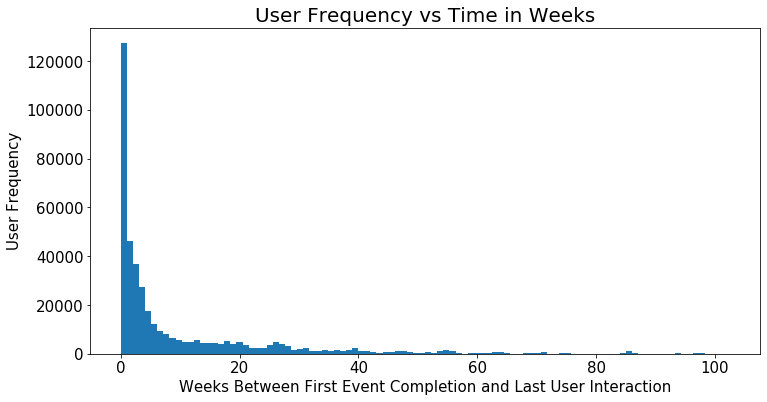

In [19]:
# User_id vs Timestamp
# Had to convert time from in milliseconds to weeks
ts = df_train['timestamp']/(31536000000/52)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100) 
plt.title("User Frequency vs Time in Weeks", fontsize=20)
plt.xlabel("Weeks Between First Event Completion and Last User Interaction", fontsize=15)
plt.ylabel("User Frequency", fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show()

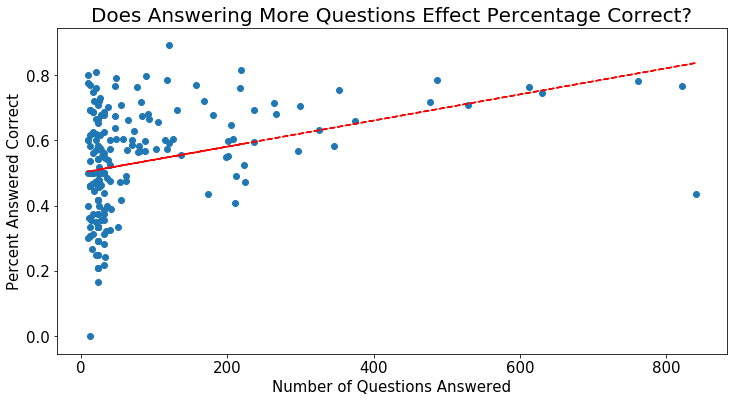

In [20]:
# Percent of Questions Answered Correct vs. Number of Questions Answered Per User
user_percent = df_train[df_train.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Does Answering More Questions Effect Percentage Correct?", fontsize=20)
plt.xlabel("Number of Questions Answered", fontsize=15)
plt.ylabel("Percent Answered Correct", fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

# Feature Selection

## Seperate the features and target

In [21]:
# Creating train, validate, test DFs that only include non-target variables
X_train = train_s.drop(columns='answered_correctly')
y_train = train_s['answered_correctly']

X_validate = validate_s.drop(columns='answered_correctly')
y_validate = validate_s['answered_correctly']

X_test = test_s.drop(columns='answered_correctly')
y_test = test_s['answered_correctly']

In [22]:
# Take a peek at the X_train
X_train.head(3)

,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,0,0.630049,0.818182,0.682248,0.119858,0.515734,0.0,0.001202
1,0,0.630049,0.550000,0.534988,0.119858,0.515734,0.0,0.001202
2,0,0.630049,0.444444,0.445216,0.119858,0.515734,0.0,0.001202


In [23]:
# Take a peak at the y_train
y_train.head(3)

0    1
1    0
2    1
Name: answered_correctly, dtype: int64

## Select top 5 features by Select K Best

In [24]:
# Compute the top 5 features by 
f_features = explore.KBest_ranker(X_train, y_train, 5)

# Print the top 5 features
f_features

['question_had_explanation',
 'user_acc_mean',
 'mean_content_accuracy',
 'mean_task_accuracy',
 'mean_timestamp_accuracy_scaled']

## Select top 5 features by Recursive Feature Elimination (RFE)

In [25]:
# Using function from explore.py to rank using RFE
rfe_ranker(train_s).head(5)

,Feature,Rank
2,mean_content_accuracy,1
1,user_acc_mean,2
3,mean_task_accuracy,3
7,avg_user_q_time_scaled,4
0,question_had_explanation,5


**Takeaways**
<br>
The top 4 features that Select K Best and RFE rankers found in common were:

- mean_content_accuracy
- user_acc_mean
- mean_task_accuracy
- prior_question_had_explanation

We will move forward with these 4 features since they were all present in the top 5 features of both rankers.

# Hypothesis Testing

## Hypothesis Test 1

### General Inquiry
<br>
Does a student receiving an explanation prior to a question have a connection with whether or not they'll answer it correctly?

### Chi-Squared Test

H0: question_had_explanation and answered_correctly are independent
<br>
Ha: question_had_explanation and answered_correctly are dependant

In [26]:
# creating crosstab of data reflecting if question 
# was answered correctly and if it had an explanation
observed_pqhe = pd.crosstab(train.answered_correctly, 
                            train.question_had_explanation)

# displaying crosstab
observed_pqhe

question_had_explanation,0,1
answered_correctly,,
0,21210,119596
1,21974,240597


In [27]:
# calculating chi^2, p value, degrees of freedom and expected values
chi2, p, degf, expected = stats.chi2_contingency(observed_pqhe)

# printing results
print('alpha = .05\n')
print(f'p = {p:.4f}')

alpha = .05

p = 0.0000


- p is less than alpha so we reject the null hypothesis that answered_correctly and question_had_explanation are independent

## Hypothesis Test 2

### General Inquiry
<br>
Is there a linear relationship between the average time it takes a user to answer a question and their average accuracy?

### Pearson Correlation Test

H0: There is no linear relationship between avg_user_q_time and user_acc_mean
<br>
Ha: There is a linear relationship between avg_user_q_time and user_acc_mean

In [28]:
# performing pearson correlation test
r, p = stats.pearsonr(train.avg_user_q_time, train.user_acc_mean)

# displaying alpha and test results
print("alpha = .05\n")
print("r correlation coefficient", r)
print("p value                   ", p)

alpha = .05

r correlation coefficient -0.053798627856180434
p value                    3.0491148951959335e-256


- p is less than alpha so we reject the null hypothesis that there is no linear relationship between avg_user_q_time and user_acc_mean

- Given the r correlation coefficient of -.06, we see that there is an extremely weak inverse linear relationship between the variables

## Hypothesis Test 3

### General Inquiry
<br>
Users with higher accuracy tend to take less time to answer questions than others. Is this still the case when it comes to difficult questions (questions with below average content accuracy)?

### Two-Sample One-Tailed T-Test
H0: The avg time that users with above avg accuracy spend on questions with below avg content accuracy is equal to the avg time that users with avg or below accuracy spend on them.
<br><br>
Ha: The avg time that users with above avg accuracy spend on questions with below avg content accuracy is less than the avg time that users with avg or below accuracy spend on them.

In [29]:
# creating df of all questions that had less than average mean_content_accuracy
# ie. all questions that users answered incorrectly more often than average
hard_questions = train[train.mean_content_accuracy < train.mean_content_accuracy.mean()]

# filtering DF above for all users with above avg accuracy
hi_acc_users = hard_questions[hard_questions.user_acc_mean > hard_questions.user_acc_mean.mean()]

# filtering DF above for all users with avg or below accuracy
low_acc_users = hard_questions[hard_questions.user_acc_mean <= hard_questions.user_acc_mean.mean()]

In [30]:
# performing two sample, one tailed t-test
t, p = stats.ttest_ind(hi_acc_users.q_time, low_acc_users.q_time, equal_var = False)

# printing alpha and test results
print('alpha = .05\n')
print("test statistic   ", t)
print("p value           ", p/2)

alpha = .05

test statistic    -2.4486883290862065
p value            0.007169406674703144


- p is less than alpha and the test statistic value is negative so we can reject the null hypothesis 
- If users with above average accuracy are answering questions (difficult and otherwise) more quickly than others users, then they may be more well prepared for the content they're facing
- If the above avg accuracy users spent more time on difficult questions than others it would suggest that they may not be more well prepared, but rather that they are more cognizant of when they've approached difficult questions that they should take their time with

## Hypothesis Test 4

### General Hypothesis
<br>
Is their a linear relationship between the amount of lectures a user has viewed and their task performance? Task performance is measured by a users overall performance on each bundle of questions. A bundle can contain 1 or more questions.

### Pearson Correlation Test

H0: There is no linear relationship between user_lectures_running_total and mean_task_accuracy
<br>
Ha: There is a linear relationship between user_lectures_running_total and mean_task_accuracy

In [31]:
# performing pearson correlation test
r, p = stats.pearsonr(train.user_lectures_running_total, train.mean_task_accuracy)

# printing alpha and results
print("alpha = .05\n")
print("r correlation coefficient", r)
print("p value                  ", p)

alpha = .05

r correlation coefficient 0.20740509858727074
p value                   0.0


- Since p is less than alpha we will reject the null hypothesis that there is no linear relationship between mean_task_accuracy and user_lectures_running_total
- The r correlation coefficient of .22 indicates that there is a weak linear relationship between these variables
    - As the amount of lectures that a user has seen increases, so does their task accuracy on average
    - Viewing lectures may be having a positive, albeit weak impact on user performance

In [ ]:
<b>Takeaways</b>

# Modeling

## Compute the AUC score of the baseline

### Use the randomly generated classes as the baseline

In [32]:
# Compute the size of y_train
size = y_train.size

# Construct y_baseline
y_baseline_random = np.random.randint(2, size=size)

# Print the y_baseline
y_baseline_random

array([0, 0, 1, ..., 1, 1, 1])

In [33]:
# Compute the auc score 
roc_auc_score(y_train, y_baseline_random)

0.4999030286302653

### Use the most frequent calss as the baseline

In [34]:
# Compute the most frequent class
y_train.value_counts(normalize=True)

1    0.650932
0    0.349068
Name: answered_correctly, dtype: float64

In [35]:
# Construct the y_baseline_frequency
y_baseline_frequency = np.array([1]*size)

# Check the baseline values
y_baseline_frequency

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
# Compute the auc score 
roc_auc_score(y_train, y_baseline_frequency)

0.5

**Takeaways**
1. Two methods are used to generate the baseline values.
2. The baseline is 0.5 regardless of the chosen methods.

## Model the train/validate/test using various classification algorithms

In [37]:
# Create a list of names of the classifiers
# Make sure all the classifiers have the method: predict_proba
names = ['LogisticRegression',
         'Decision Tree',
         'Random Forest',
         'Ada Boost',
         'Gradient Boost',
         'Nearest Neighbors',
         'Naive Bayes',
         'Neural Net'
        ]

In [38]:
# Create a list of classifiers
classifiers = [LogisticRegression(), 
               DecisionTreeClassifier(max_depth=3),
               RandomForestClassifier(max_depth=3),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               KNeighborsClassifier(3),
               GaussianNB(), 
               MLPClassifier()
              ]

In [39]:
# Sanity check: the size between the two should be the same
len(names) == len(classifiers)

True

In [40]:
# Use the classifiers created above to model the train, validate and test
metrics = model.model_multiple_algos(names, classifiers, 
                                     X_train, y_train, 
                                     X_validate, y_validate, 
                                     X_test, y_test)

Currently running on model LogisticRegression
LogisticRegression has completed
Currently running on model Decision Tree
Decision Tree has completed
Currently running on model Random Forest
Random Forest has completed
Currently running on model Ada Boost
Ada Boost has completed
Currently running on model Gradient Boost
Gradient Boost has completed
Currently running on model Nearest Neighbors
Nearest Neighbors has completed
Currently running on model Naive Bayes
Naive Bayes has completed
Currently running on model Neural Net
Neural Net has completed


In [41]:
# Rank the auc scores on test dataset in the descending order
mask = (metrics.dataset == 'test')
metrics[mask].sort_values(by="AUC score", ascending=False)

,AUC score,Algo,dataset
8,0.693024,Random Forest,test
2,0.690355,LogisticRegression,test
14,0.688050,Gradient Boost,test
23,0.687820,Neural Net,test
11,0.676692,Ada Boost,test
20,0.676435,Naive Bayes,test
5,0.675218,Decision Tree,test
17,0.626399,Nearest Neighbors,test


**Takeaways**
- The highest AUC score on the test dataset is produced by Logistic Regression.
- The AUC score from the top model is 0.69, which beats the baseline by 19%. 

### Plot the ROC curve on the top model

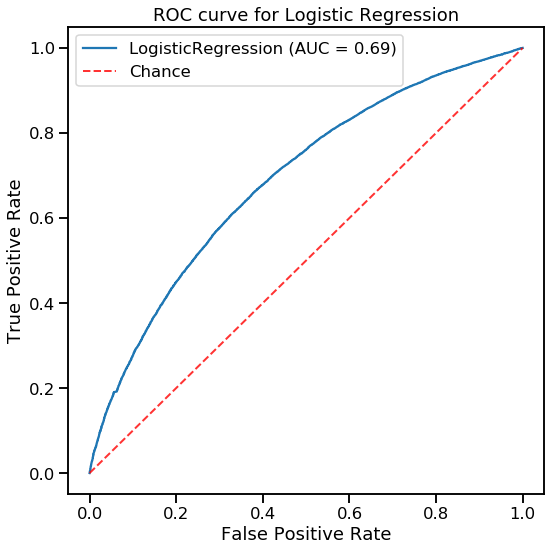

In [42]:
# Create the lr object and fit on train
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

# Plot the ROC curve on test
model.auc_curve_plot1(lr, "Logistic Regression", X_test, y_test)

In [ ]:
<b>Takeaways</b>

# Conclusions

- The highest AUC score on the test dataset is produced by Logistic Regression.
- The AUC score from the top model is 0.69, which beats the baseline by 19%.

### Future Investigations

- Use this predictive model on Riiid's other educational programs 

### Resources

- https://www.kaggle.com/c/riiid-test-answer-prediction/overview/description
- https://www.kaggle.com/isaienkov/riiid-answer-correctness-prediction-eda-modeling

### Contact Us

Dani Bojado
- daniella.bojado@gmail.com 

Samuel Davila
- samuelrdavila@gmail.com

Yongliang Shi
- yongliang.michael.shi@gmail.com

Christopher Logan Ortiz
- christopher.logan.ortiz@gmail.com